# Data Handling

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, explained_variance_score
from sklearn.metrics import explained_variance_score, max_error, mean_absolute_error
from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer, matthews_corrcoef


from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import Ridge, Lasso

from statsmodels.api import OLS, add_constant

def printRegStatistics(truth, preds):
    print("The RVE is: ", explained_variance_score(truth, preds))
    print("The rmse is: ", mean_squared_error(truth, preds, squared=False))
    corr, pval = pearsonr(truth, preds)
    print("The Correlation Score is is: %6.4f (p-value=%e)\n"%(corr,pval))
    print("The Maximum Error is is: ", max_error(truth, preds))
    print("The Mean Absolute Error is: ", mean_absolute_error(truth, preds))

#Transform the Data Set into a pandas DataFrame
df = pd.read_csv("HA1-DatasetScaled.tsv", sep="\t")

#Extract the independent variables
X = df.iloc[:, :81].values

#Extract the dependent variable
y = df.values[:,81]
yc = np.array([int(i>=80) for i in y])

col_names=np.array(df.columns)[0:81]

# Classification

These are the training set statistics:
The Precision is:  0.6139
The Recall is:  0.4502
The F1 score is:  0.5195
The Matthews correlation coefficient is:  0.4473


C:\Users\Utilizador\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


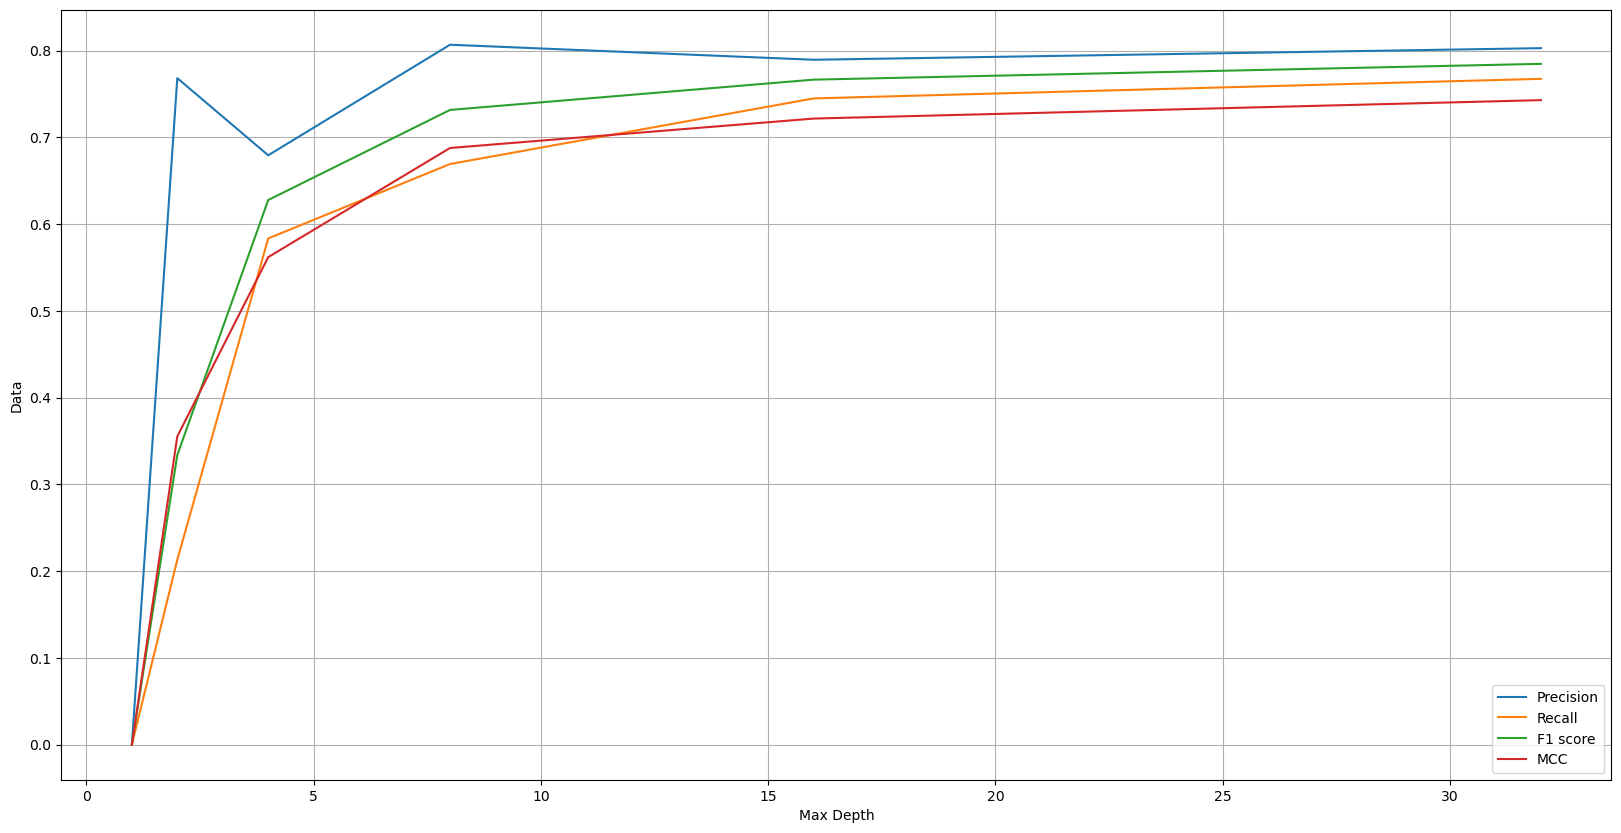

In [3]:
X_TRAIN, X_IVS, y_TRAIN, y_IVS = train_test_split( X, yc, test_size=0.25, random_state=123)

kf = KFold(n_splits=5, shuffle=True)
TRUTH=None
PREDS=None
for train_index, test_index in kf.split(X_TRAIN):
    X_train, X_test = X_TRAIN[train_index], X_TRAIN[test_index]
    y_train, y_test = y_TRAIN[train_index], y_TRAIN[test_index]
    
    mdl = DecisionTreeClassifier(max_depth=3)
    mdl.fit(X_train, y_train)
    preds = mdl.predict(X_test)
    if TRUTH is None:
        PREDS=preds
        TRUTH=y_test
    else:
        PREDS=np.hstack((PREDS, preds))
        TRUTH=np.hstack((TRUTH, y_test))


print("These are the training set statistics:")
print("The Precision is: %7.4f" % precision_score(TRUTH, PREDS))
print("The Recall is: %7.4f" % recall_score(TRUTH, PREDS))
print("The F1 score is: %7.4f" % f1_score(TRUTH, PREDS))
print("The Matthews correlation coefficient is: %7.4f" % matthews_corrcoef(TRUTH, PREDS))


prec = []
rec = []
f1 = []
mccs = []
maxdepths = [1, 2, 4, 8, 16, 32]
for i in maxdepths:
    mdl = DecisionTreeClassifier(max_depth=(i))
    mdl = mdl.fit(X_TRAIN, y_TRAIN)
    ivs_preds = mdl.predict(X_IVS)
    prec.append(precision_score(y_IVS,ivs_preds))
    rec.append(recall_score(y_IVS,ivs_preds))
    f1.append(f1_score(y_IVS,ivs_preds))
    mccs.append(matthews_corrcoef(y_IVS,ivs_preds))

plt.figure(figsize=(20,10))
plt.plot(maxdepths, prec, label='Precision')
plt.plot(maxdepths, rec, label='Recall')
plt.plot(maxdepths, f1, label='F1 score')
plt.plot(maxdepths, mccs, label='MCC')
plt.xlabel("Max Depth")
plt.ylabel("Data")
plt.legend()
plt.grid()
plt.show()


# Linear Regression Classification

# Regression

---------------------------------------------------
RVE:  0.5349
rmse: 23.3085
The Correlation Score is is: 0.7314 (p-value=0.000000e+00)

The Maximum Error is is:  110.47964956250004
The Mean Absolute Error is:  17.43197243289114
The Max depth is 1
---------------------------------------------------
---------------------------------------------------
RVE:  0.6626
rmse: 19.8521
The Correlation Score is is: 0.8140 (p-value=0.000000e+00)

The Maximum Error is is:  113.99315096129837
The Mean Absolute Error is:  13.817467078538055
The Max depth is 2
---------------------------------------------------
---------------------------------------------------
RVE:  0.7384
rmse: 17.4807
The Correlation Score is is: 0.8593 (p-value=0.000000e+00)

The Maximum Error is is:  119.59
The Mean Absolute Error is:  12.106356729234683
The Max depth is 4
---------------------------------------------------
---------------------------------------------------
RVE:  0.8357
rmse: 13.8529
The Correlation Score is 

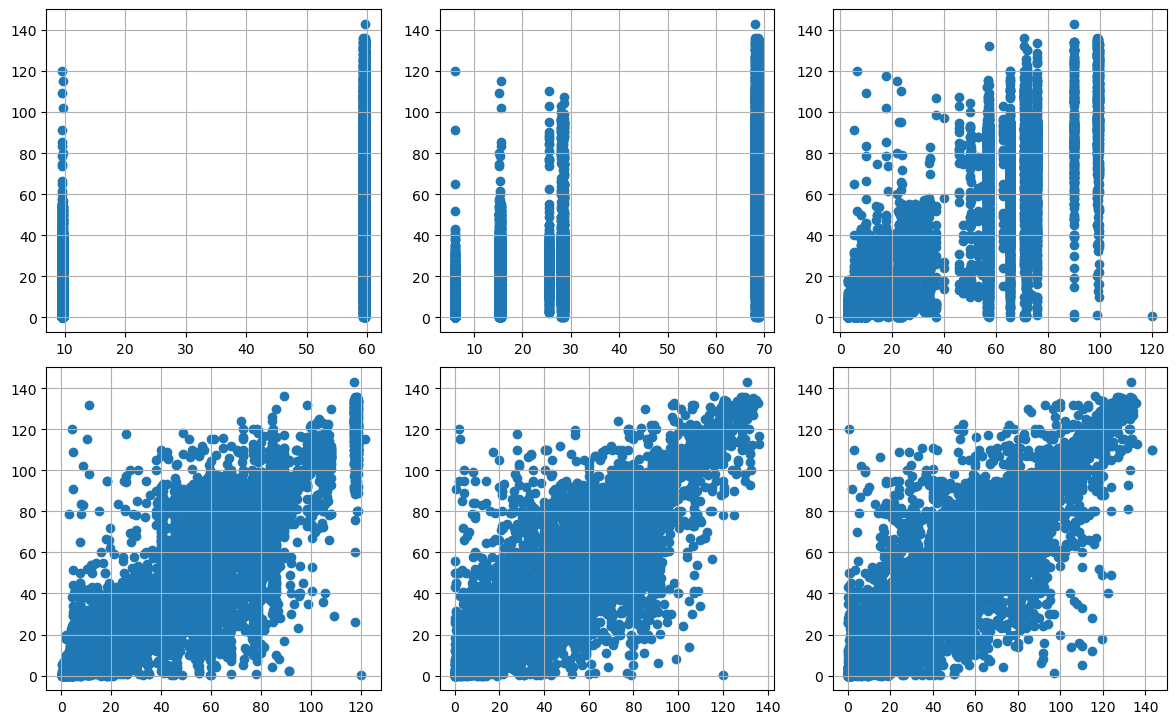

In [4]:
X_TRAIN, X_IVS, y_TRAIN, y_IVS = train_test_split( X, y, test_size=0.25, random_state=123)

plt.figure(figsize=(12, 8))

maxdepths = [1, 2, 4, 8, 16, 32]

for i, md in enumerate(maxdepths):
    kf = KFold(n_splits=5, shuffle=True)
    TRUTH=None
    PREDS=None
    for train_index, test_index in kf.split(X_TRAIN):
        X_train, X_test = X_TRAIN[train_index], X_TRAIN[test_index]
        y_train, y_test = y_TRAIN[train_index], y_TRAIN[test_index]

        mdl = DecisionTreeRegressor(max_depth=md)
        mdl.fit(X_train, y_train)
        preds = mdl.predict(X_test)
        if TRUTH is None:
            PREDS=preds
            TRUTH=y_test
        else:
            PREDS=np.hstack((PREDS, preds))
            TRUTH=np.hstack((TRUTH, y_test))
    print('---------------------------------------------------')
    print("RVE: %7.4f"  % explained_variance_score(TRUTH, PREDS))
    print("rmse: %7.4f" % mean_squared_error(TRUTH, PREDS, squared=False))
    corr, pval=pearsonr(TRUTH, PREDS)
    print("The Correlation Score is is: %6.4f (p-value=%e)\n"%(corr,pval))
    print("The Maximum Error is is: ", max_error(TRUTH, PREDS))
    print("The Mean Absolute Error is: ", mean_absolute_error(TRUTH, PREDS))
    print("The Max depth is", md)
    print('---------------------------------------------------')
    
    plt.subplot(2, 3, i + 1)
    plt.scatter(PREDS, TRUTH)
    plt.grid(True)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In [5]:
melhor_max_depth= 4

kf = KFold(n_splits=5, shuffle=True)
TRUTH=None
PREDS=None
for train_index, test_index in kf.split(X_TRAIN):
    X_train, X_test = X_TRAIN[train_index], X_TRAIN[test_index]
    y_train, y_test = y_TRAIN[train_index], y_TRAIN[test_index]

    mdl = DecisionTreeRegressor(max_depth=melhor_max_depth)
    mdl.fit(X_train, y_train)
    preds = mdl.predict(X_test)
    if TRUTH is None:
        PREDS=preds
        TRUTH=y_test
    else:
        PREDS=np.hstack((PREDS, preds))
        TRUTH=np.hstack((TRUTH, y_test))
        
print('---------------------------------------------------')
print("RVE: %7.4f"  % explained_variance_score(TRUTH, PREDS))
print("rmse: %7.4f" % mean_squared_error(TRUTH, PREDS, squared=False))
corr, pval=pearsonr(TRUTH, PREDS)
print("The Correlation Score is is: %6.4f (p-value=%e)\n"%(corr,pval))
print("The Maximum Error is is: ", max_error(TRUTH, PREDS))
print("The Mean Absolute Error is: ", mean_absolute_error(TRUTH, PREDS))
print("The Max depth is", melhor_max_depth)
print('---------------------------------------------------')

tree_rve = explained_variance_score(y_test, preds)
tree_rmse = mean_squared_error(y_test, preds, squared=False)
corr, pval = pearsonr(y_test, preds)
tree_CS = corr
tree_pval = pval
tree_ME = max_error(y_test, preds)
tree_MAE = mean_absolute_error(y_test, preds)

---------------------------------------------------
RVE:  0.7364
rmse: 17.5479
The Correlation Score is is: 0.8581 (p-value=0.000000e+00)

The Maximum Error is is:  119.59
The Mean Absolute Error is:  12.130577385634124
The Max depth is 4
---------------------------------------------------


# Linear Regression

The RVE is:  0.7377526765338279
The rmse is:  17.708343541541517
The Correlation Score is is: 0.8589 (p-value=0.000000e+00)

The Maximum Error is is:  85.72067049808432
The Mean Absolute Error is:  12.323434266168764


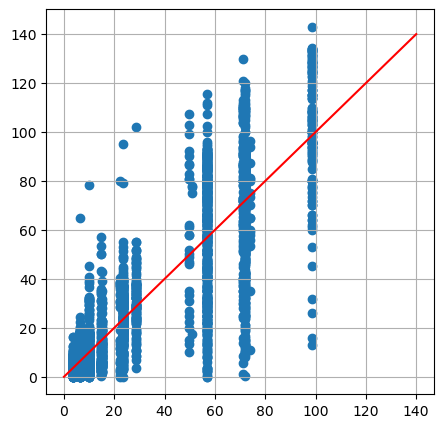

In [6]:
reg = LinearRegression().fit(X_train, y_train)

printRegStatistics(y_test, preds)
linear_rve = explained_variance_score(y_test, preds)
linear_rmse = mean_squared_error(y_test, preds, squared=False)
corr, pval = pearsonr(y_test, preds)
linear_CS = corr
linear_pval = pval
linear_ME = max_error(y_test, preds)
linear_MAE = mean_absolute_error(y_test, preds)

plt.figure(figsize=(5,5))
plt.scatter(preds, y_test)
plt.plot((0, 140), (0, 140), c="r")
plt.grid()
plt.show()

In [9]:
rveCorrelation = 0
alphaMaior = 0
for i in range(5, 50, 5):
    ridge = Ridge(alpha=i, max_iter=9999999).fit(X_train, y_train)
    preds=ridge.predict(X_test)
    if (explained_variance_score(y_test, preds)>rveCorrelation):
        rveCorrelation = explained_variance_score(y_test, preds)
        alphaMaior = i
ridge = Ridge(alpha=alphaMaior, max_iter=9999999).fit(X_train, y_train)

O melhor resultado foi com alpha = 5:
The RVE is:  0.7363756110594875
The rmse is:  17.753809440570276
The Correlation Score is is: 0.8583 (p-value=0.000000e+00)

The Maximum Error is is:  75.41259373124
The Mean Absolute Error is:  13.533322876108008


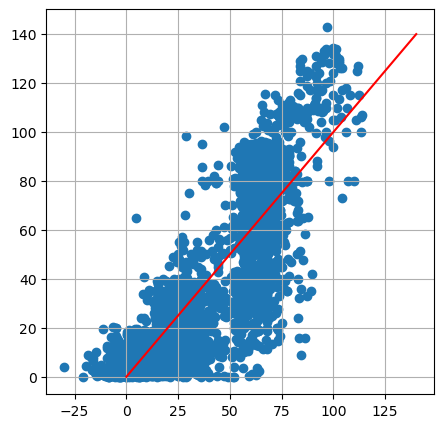

In [10]:
preds=ridge.predict(X_test)
print("O melhor resultado foi com alpha = " + str(alphaMaior) + ":")
printRegStatistics(y_test, preds)
rr_rve = explained_variance_score(y_test, preds)
rr_rmse = mean_squared_error(y_test, preds, squared=False)
corr, pval = pearsonr(y_test, preds)
rr_CS = corr
rr_pval = pval
rr_ME = max_error(y_test, preds)
rr_MAE = mean_absolute_error(y_test, preds)

plt.figure(figsize=(5,5))
plt.scatter(preds, y_test)
plt.plot((0, 140), (0, 140), c="r")
plt.grid()
plt.show()

In [11]:
rveCorrelation = 0
alphaMaior = 0

for i in range(2, 20, 2):
    L = Lasso(alpha=i/10, max_iter=9999999).fit(X_train, y_train)
    preds=L.predict(X_test)
    if (explained_variance_score(y_test, preds)>rveCorrelation):
        rveCorrelation = explained_variance_score(y_test, preds)
        alphaMaior = i/10
        
L = Lasso(alpha=alphaMaior, max_iter=9999999).fit(X_train, y_train)

O melhor resultado foi com alpha = 0.2:
The RVE is:  0.6943501828132971
The rmse is:  19.116807720318924
The Correlation Score is is: 0.8341 (p-value=0.000000e+00)

The Maximum Error is is:  71.27073535953623
The Mean Absolute Error is:  14.731284220370442


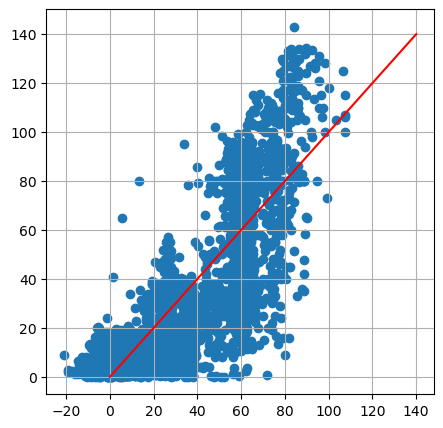

In [12]:
preds=L.predict(X_test)
print("O melhor resultado foi com alpha = " + str(alphaMaior) + ":")
printRegStatistics(y_test, preds)
lr_rve = explained_variance_score(y_test, preds)
lr_rmse = mean_squared_error(y_test, preds, squared=False)
corr, pval = pearsonr(y_test, preds)
lr_CS = corr
lr_pval = pval
lr_ME = max_error(y_test, preds)
lr_MAE = mean_absolute_error(y_test, preds)

plt.figure(figsize=(5,5))
plt.scatter(preds, y_test)
plt.plot((0, 140), (0, 140), c="r")
plt.grid()
plt.show()

In [13]:
dataRegressao = {'':  ['RVE', 'RMSE', 'Correlation Score', 'Maximum Error', 'Mean Absolute Error'],'Decision Tree Regressor': [tree_rve, tree_rmse, tree_CS, tree_ME, tree_MAE],'Linear Regressor': [linear_rve, linear_rmse, linear_CS, linear_ME, linear_MAE],'Ridge Regression': [rr_rve, rr_rmse, rr_CS, rr_ME, rr_MAE],'Lasso Regression': [lr_rve, lr_rmse, lr_CS, lr_ME, lr_MAE],}
dfRegression = pd.DataFrame (dataRegressao, columns = ['','Decision Tree Regressor', 'Linear Regressor', 'Ridge Regression', 'Lasso Regression'])
dfRegression

,,Decision Tree Regressor,Linear Regressor,Ridge Regression,Lasso Regression
0,RVE,0.737753,0.737753,0.736376,0.694350
1,RMSE,17.708344,17.708344,17.753809,19.116808
2,Correlation Score,0.858937,0.858937,0.858347,0.834147
3,Maximum Error,85.720670,85.720670,75.412594,71.270735
4,Mean Absolute Error,12.323434,12.323434,13.533323,14.731284
